*Environment preparation:*

In [2]:
!pip install tensorflow==1.6.0 numpy scipy opencv-python pillow matplotlib h5py keras==2.1.5 imageai==2.1.3

# Intro to ML and CNNs

## We are given a task to recognize cats and dogs in the images.

**What rules can we establish to distinguish cats from dogs:**
- Rule 1: dogs have bigger noses with respect to their head than cats
    - Numerical value (R1): how much area of the head does the nose occupies (nose area / head area)
- Rule 2: dogs have bigger ears with respect to their head than cats
    - Numerical value (R2): the ratio between ears area and head area (ears area / head area)
    



**Next we will train a model with 3 dogs and 3 cats:**
- *Dogs:* 
    - 1. R1=0.5, R2=0.4 
    - 2. R1=0.5, R2=0.3
    - 3. R1=0.4, R2=0.4
- *Cats:* 
    - 1. R1=0.1, R2=0.2
    - 2. R1=0.2, R2=0.1
    - 3. R1=0.05, R2=0.2

In [6]:
import numpy as np
from keras.utils import np_utils
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

x = [
 [0.5, 0.4], [0.5, 0.3], [0.4, 0.4],
 [0.1, 0.2], [0.2, 0.1], [0.05, 0.2]
]
y = [1, 1, 1, 0, 0, 0]


model = Sequential()
model.add(Dense(2, activation="softmax", input_dim=2, use_bias=True))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(np.array(x), np.array(y), epochs=10000, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [7]:
print("Weights:\n", model.layers[0].get_weights()[0])
print("Biases:\n", model.layers[0].get_weights()[1])

Weights:
 [[-6.381241   6.258182 ]
 [-6.5129614  6.2477956]]
Biases:
 [ 3.5136306 -3.5136309]


In [8]:
print("Predictions:\n", model.predict(np.array(x), verbose=0))

Predictions:
 [[0.01216741 0.98783255]
 [0.04226235 0.9577377 ]
 [0.04177397 0.9582261 ]
 [0.96125233 0.03874761]
 [0.96170175 0.03829821]
 [0.9790233  0.02097679]]


### **Manual calulation of the softmax output for the first dog and the first cat:**

In [9]:
from scipy.special import softmax

w = model.layers[0].get_weights()[0]
b = model.layers[0].get_weights()[1]

print("Cat:", softmax([x[3][0]*w[0][0] + x[3][1]*w[1][0] + b[0], x[3][0]*w[0][1] + x[3][1]*w[1][1] + b[1]]))
print("Dog:", softmax([x[0][0]*w[0][0] + x[0][1]*w[1][0] + b[0], x[0][0]*w[0][1] + x[0][1]*w[1][1] + b[1]]))

Cat: [0.96125239 0.03874761]
Dog: [0.0121674 0.9878326]


---

## CNN

- CNN was originally proposed by Y. LeCun as an architecture that can do better image classification that previous solutions
- one of the most significant discoveries that contributed today's neural network popularity
- specialized for processing grid-shaped data (images are one example of it)




**Convolutional neural network** is yet another type of neural network. From the conceptual point of view, it looks like a normal neural network. The only difference is special layers called **Convolutional layers** hence the name CNN's.


<img src="img/simple_neural_network.png" style="height:70%;width:70%">




The magic of CNN happens in those convolutional layers, so let's take a closer look at them.



---
### Convolution layer

We saw before that image is represented by a matrix of values. For the sake of example, let's say it's the following matrix:


<img src="img/eg_matrix.png"/>

Looks like the shape of the number 1, because it is.



We observe this matrix as input to the convolution layer. The convolution layer contains a filter which is a small matrix of some values. A filter is exactly what you think it is; we take a filter of a specified size (a rule of thumb is 3x3 or 5x5) and we move this across the image from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. 

---

Let say we have a the following filter:

<img src="img/eg_filter.png"/>


Now we take that filter and move it across our input matrix sliding the filter by one pixel each step. Every step of the way we make a **sum** of multiplied values.

---

After sliding the filter across our input, we will get a new matrix called *feature map*:


<img src="img/eg_convolved.png"/>


Sliding the filter across the matrix is called *convolving* hence the name *convolution layer*.

*The process of convolving can be seen in demo.xlsx-Convolving*



----
From the previous example, we can see that we used the filter to extract important features/edges from input data. 
But one thing is to notice: the size of the input matrix has shrunk. 
Sometimes that is not important but imagine some useful information was contained in the corners of the input data and after convolution, it was gone.

To battle this problem we have to apply **padding** to our input data. There is two kinds of padding:
- **valid**
- **same**


Previously we saw *valid* padding which means no change to input data.

When we use *same* padding our input data is padded with zeros to keep the original data size in the output. The number of rows and columns of zeros padded around data is determined by the size of the data and filter size.

*Padding can be seen in demo.xlsx-Padding*


---


### Padding="valid"

In [10]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="valid", input_shape=(20, 20, 3))) # kernel_size = filter size
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu", padding="valid"))
model.add(Conv2D(64, kernel_size=(7, 7), activation="relu", padding="valid"))

model.add(Flatten()) # Pretvori 2D array u 1D array

model.add(Dense(2, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 18, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          200768    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 8194      
Total params: 261,122
Trainable params: 261,122
Non-trainable params: 0
_________________________________________________________________


### Padding="same"

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(20, 20, 3)))
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(7, 7), activation="relu", padding="same"))

model.add(Flatten())

model.add(Dense(2, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 20, 20, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        200768    
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 51202     
Total params: 304,130
Trainable params: 304,130
Non-trainable params: 0
_________________________________________________________________


---

There is another parameter we can control called **stride**. We mentioned that in process of convolving we move the filter across the matrix pixel by pixel from the left-upper corner to the down-right corner. 

**Stride** parameter is then defined as **1** or **(1, 1)** which means that we slide a filter pixel by pixel. 

Setting different values for this parameter will alter sliding behavior, the first part of the parameter is the number of pixel to slide towards the right and the second part is the number of pixels to slide towards the bottom (eg. *(2, 2)* or *2*, *(3, 3)* or *3*, etc).


*For now the padding can be seen in demo.xlsx-Stride*


---

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", strides=(1, 1), padding="same", input_shape=(20, 20, 3)))
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu", strides=(2, 2), padding="same"))
model.add(Conv2D(64, kernel_size=(7, 7), activation="relu", strides=(3, 3), padding="same"))

model.add(Flatten())

model.add(Dense(2, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 20, 20, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          200768    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2050      
Total params: 254,978
Trainable params: 254,978
Non-trainable params: 0
_________________________________________________________________


---
### Pooling

Typically added after convolution layer in CNN.

It reduces the dimension of the input data while extracting its most important features.

A few versions:
- **Mean pooling:** calculates the mean within the pooling frame.

- **Sum Pooling:** sum of values within the pooling frame.

- **Max pooling:** takes a maximum value within the pooling frame. This version is more widely used.




Pooling is very similar to a process convolving except it doesn't do matrix multiplication with filter values. It basically does a sliding frame pass through a matrix and does some of the above-mentioned operations on the frame. It has parameters **stride** and **padding** that work the same as in the convolution layer.


*Pooling can be seen in demo.xlsx-Pooling*

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(1, 1), activation="relu", strides=(1, 1), padding="same", input_shape=(20, 20, 3)))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2), padding="same"))
model.add(Conv2D(64, kernel_size=(1, 1), activation="relu", strides=(1, 1), padding="same"))

model.add(Flatten())

model.add(Dense(2, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        2112      
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 12802     
Total params: 15,042
Trainable params: 15,042
Non-trainable params: 0
_________________________________________________________________


---

**Complete CNN network**

We are now ready to complete our CNN network.

CNNs are usually built by adding convolution layers at the beginning of the network, then the pooling layer, convolution layer, and so on. At the end of the network, we then add a few fully connected (*Dense*) layers and of course our class outputs at the end.


<img src="img/cnn_explained.jpeg"/>


In [14]:
# Full super-simple example

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten


model = Sequential()

model.add(Conv2D(1, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", input_shape=(5, 5, 1)))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding="same"))

model.add(Flatten())

model.add(Dense(2, activation="softmax"))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 5, 5, 1)           10        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 1)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 52        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Our data

one = [
    [0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
]

zero = [
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0]
]

train_data = [zero, one]

train_labels = [0, 1]

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
import numpy as np

train_data = np.array(train_data).reshape(2, 5, 5, 1)
train_labels = np.array(train_labels)

model.fit(train_data, train_labels, epochs=1000, verbose=0)

In [18]:
yhat = model.predict(np.array(zero).reshape(1, 5, 5, 1), verbose=0)
print(yhat) # As a result we get probability of input being a certain class 
print("Num is {0}".format(np.argmax(yhat)))

[[0.99815136 0.00184863]]
Num is 0


In [19]:
yhat = model.predict(np.array(one).reshape(1, 5, 5, 1), verbose=0)
print(yhat)
print("Num is {0}".format(np.argmax(yhat)))

[[0.00155331 0.99844676]]
Num is 1


--- 
### Parameters of trained network

In [20]:
# Filter values:
print(model.layers[0].get_weights()[0].reshape(3, 3))

# Bias of first layer
print(model.layers[0].get_weights()[1].flatten())

[[-0.4921528   0.12366891 -0.22433886]
 [ 0.2912985   0.60022587 -0.5891212 ]
 [-0.30489805  0.58913195 -0.17317937]]
[0.17319515]


In [21]:
# Weights of the last layer and first neuron
print(model.layers[3].get_weights()[0][:, 0])

# Weights of the last layer and first second
print(model.layers[3].get_weights()[0][:, 1])

# Bias of neurons in last layer
print(model.layers[3].get_weights()[1].flatten())

[ 6.5116906e-01 -8.3743803e-02 -8.7728196e-01 -1.7562108e-01
  6.5783113e-01  6.4669251e-01 -5.2262347e-02 -4.6751055e-01
  3.2069936e-01  7.3972815e-01 -1.2829968e-01 -1.0013184e-01
  1.6220774e-04  7.0463695e-02  8.0450124e-01 -6.9283091e-02
 -1.6502489e-01  5.6989485e-01 -1.8695673e-01  4.2213297e-01
  1.0360829e-01 -5.4566801e-01 -1.8018617e-01 -5.0984251e-01
  2.7056631e-01]
[ 0.05725037  0.85433435  0.23104492  0.5094657  -0.6162     -0.20758712
  0.3735041  -0.20426457 -0.17625469 -0.44666412 -0.41098663  0.59643364
  0.21325836 -0.35473603 -0.5352404  -0.41265175 -0.2072578  -0.3639004
 -0.34279338 -0.4786543  -0.24162088 -0.07066224  0.53328466  0.50695884
 -0.59305316]
[ 0.02765499 -0.02765498]


---

# Multiple objects within the image
(based on: https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e)

So far we have seen how a simple image can be classified, but what happens when there are multiple objects within an image? How do we detect and mark them?


There are a few object detection algorithms:
- **R-CNN**
- **Fast R-CNN**
- **Faster R-CNN**
- **YOLO**
- and probably a lot more of them


In object detection, the goal is to draw a bounding box around the object of interest to locate it within the image. Also, you might not necessarily draw just one bounding box in an object detection case, there could be many bounding boxes representing different objects of interest within the image and you would not know how many beforehand.


The major reason why you cannot proceed with this problem by building a standard convolutional network followed by a fully connected layer is that the length of the output layer is variable — not constant, this is because of the number of occurrences of the objects of interest is not fixed. 


A **naive approach** to solve this problem would be to take different regions of interest from the image, and use a CNN to classify the presence of the object within that region. The problem with this approach is that the objects of interest might have different spatial locations within the image and different aspect ratios. Hence, you would have to select a huge number of regions and this could computationally blow up.





## R-CNN

We use selective search to extract just 2000 regions from the image called region proposals. Therefore, now, instead of trying to classify a huge number of regions, you can just work with 2000 regions. These 2000 region proposals are generated using the selective search algorithm which is written below.


<img src="img/R_CNN.png" />


These 2000 candidate region proposals are warped into a square and fed into a convolutional neural network that produces a 4096-dimensional feature vector as output. The CNN acts as a feature extractor and the output dense layer consists of the features extracted from the image. Extracted features are then fed into an SVM to classify the presence of the object within that candidate region proposal.


<img src="img/R_CNN2.png" style="width:50%;"/>




## Fast R-CNN


Instead of feeding the region proposals to the CNN, we feed the input image to the CNN to generate a convolutional feature map. From the convolutional feature map, we identify the region of proposals and warp them into squares, and by using an RoI pooling layer we reshape them into a fixed size so that they can be fed into a fully connected layer. From the RoI feature vector, we use a softmax layer to predict the class of the proposed region and also the offset values for the bounding box.

<img src="img/FAST_R_CNN.png"/>




## YOLO - You Only Look Once


All of the previous object detection algorithms use regions to localize the object within the image. The network does not look at the complete image. Instead, parts of the image which have high probabilities of containing the object. YOLO or You Only Look Once is an object detection algorithm much different from the region-based algorithms seen above. In YOLO a single convolutional network predicts the bounding boxes and the class probabilities for these boxes.


<img src="img/YOLO.png" />


How YOLO works is that we take an image and split it into an SxS grid, within each of the grid we take m bounding boxes. For each of the bounding box, the network outputs a class probability and offset values for the bounding box. The bounding boxes having the class probability above a threshold value are selected and used to locate the object within the image.

**IMPORTANT:** download *resnet50_coco_best_v2.0.1.h5* from https://drive.google.com/open?id=1cc8QuVtpFNeGh8CU1gFsOuD0mV_rT9zf and place it in the same folder as the notebook

In [3]:
# Preparation: if you have tensorflow 2.0 installed this wont work, so start create_venv.cmd to create temp virtual environment
# Download trained model: https://github.com/OlafenwaMoses/ImageAI/releases/tag/1.0/
from imageai.Detection import ObjectDetection
import os
from IPython.display import Image
#import tensorflow
#print(tensorflow.__version__)


def predict_for_image(name):
    execution_path = os.getcwd()

    detector = ObjectDetection()
    detector.setModelTypeAsRetinaNet()
    detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
    detector.loadModel()
    detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "img/"+name), output_image_path=os.path.join(execution_path , "img/new_"+name))

    for eachObject in detections:
        print(eachObject["name"] , " : " , eachObject["percentage_probability"] )

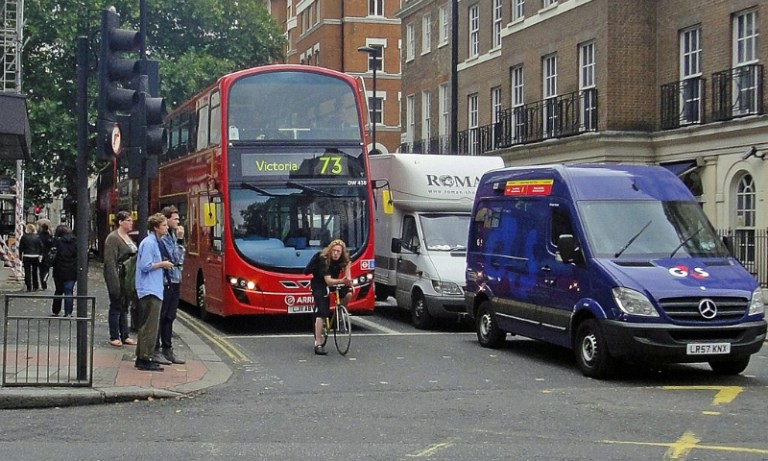

In [4]:
Image("img/image.jpeg")

In [5]:
predict_for_image("image.jpeg")

person  :  56.956976652145386
person  :  52.80917286872864
person  :  70.20386457443237
person  :  76.8346905708313
person  :  78.70022058486938
bicycle  :  79.7773540019989
person  :  83.5574209690094
person  :  89.43805694580078
truck  :  60.933101177215576
person  :  69.52632069587708
bus  :  98.00646901130676
truck  :  83.69445204734802
car  :  71.70081734657288


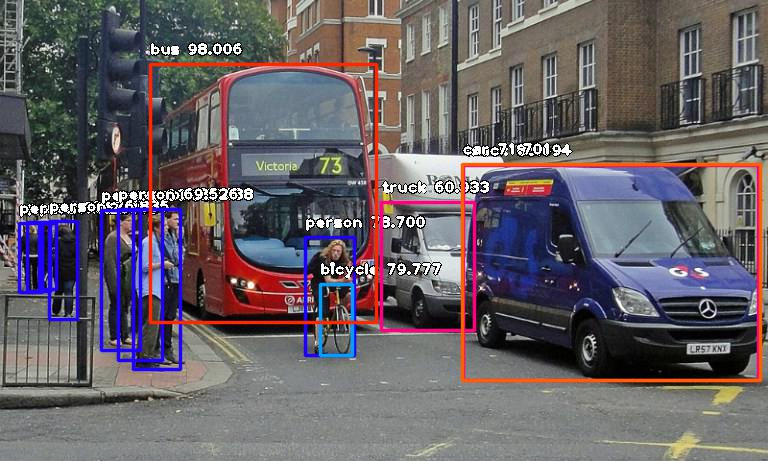

In [6]:
Image("img/new_image.jpeg")

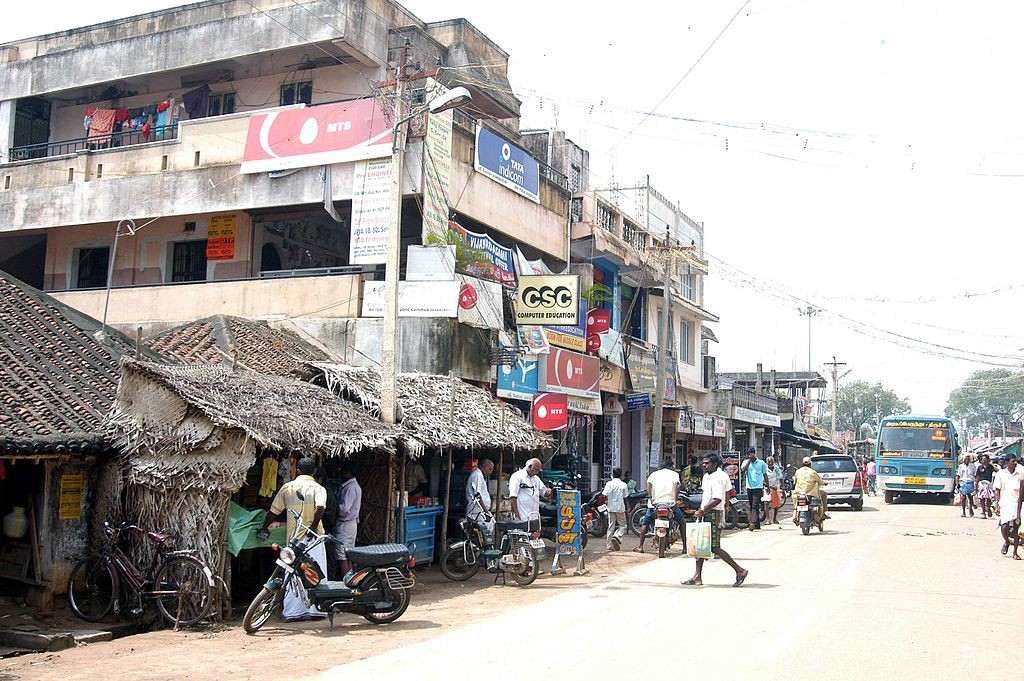

In [7]:
Image("img/image2.jpeg")

In [8]:
predict_for_image("image2.jpeg")

person  :  70.24919986724854
person  :  59.111833572387695
person  :  60.1889967918396
person  :  75.11261105537415
motorcycle  :  59.41683053970337
bus  :  99.41463470458984
car  :  73.77586960792542
person  :  67.2002375125885
person  :  62.42196559906006
person  :  78.13606858253479
person  :  62.91927695274353
person  :  73.89291524887085
person  :  59.802407026290894
person  :  80.98741173744202
motorcycle  :  50.64737796783447
motorcycle  :  67.77293086051941
person  :  71.77691459655762
bicycle  :  90.39223194122314
motorcycle  :  85.87273955345154


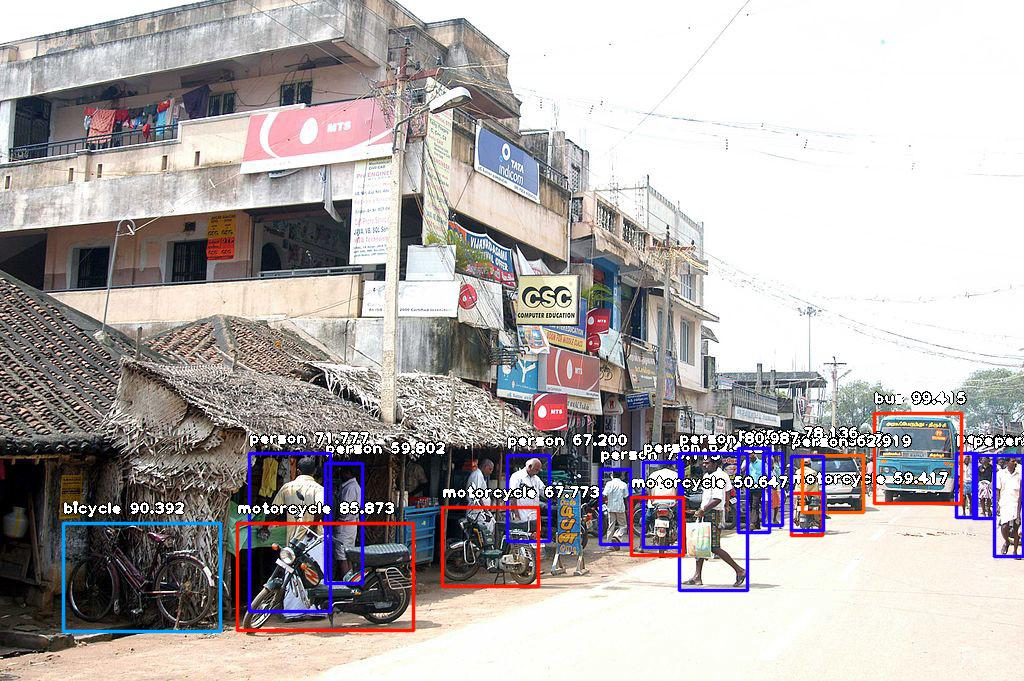

In [9]:
Image("img/new_image2.jpeg")


---


# Where to next:
- **https://modeldepot.io/**
- **https://modelzoo.co/**
- Visualize neural network model with [**TensorSpace.js**](https://github.com/tensorspace-team/tensorspace)
- Configure and test your NN in browser with [**Neural network playground**](https://playground.tensorflow.org)
    
    
 



### Sneak peek TensorSpace.js

<img src="img/TensorSpace.gif" />

---

## Appendix:


### Softmax

Softmax performs the following transform on $n$ numbers $x_1, \dots, x_n$:


$\displaystyle S(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$

The outputs of the Softmax transform are always in the range $[0, 1]$ add up to $1$. Hence, they form a probability distribution.


### ReLU (Rectified Linear Unit) Activation Function


$\displaystyle R(x) = max (0, x)$